# Model Bulding -- Unsupervised Learning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans

In [2]:
o2 = pd.read_csv("C:/Users/kashy/o2Saturation.csv")
o2

,no,O2
0,1,98.6
1,2,98.6
2,3,98.6
3,4,98.6
4,5,98.1
...,...,...
3581,3582,98.6
3582,3583,98.6
3583,3584,98.6
3584,3585,98.6


In [3]:
o2['O2'].value_counts()

98.6    1662
97.5     704
97.6     579
99.6     359
96.5     104
98.2      32
98.0      29
97.9      25
98.1      23
99.3      21
98.8      13
97.0       9
97.1       9
98.9       8
96.9       5
97.2       3
98.3       1
Name: O2, dtype: int64

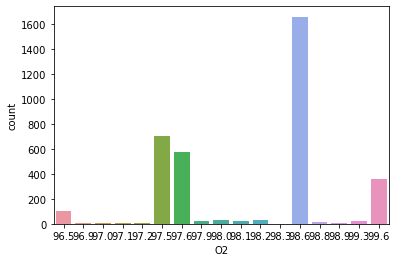

In [4]:
sns.countplot("O2", data=o2)

C:\Users\kashy\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


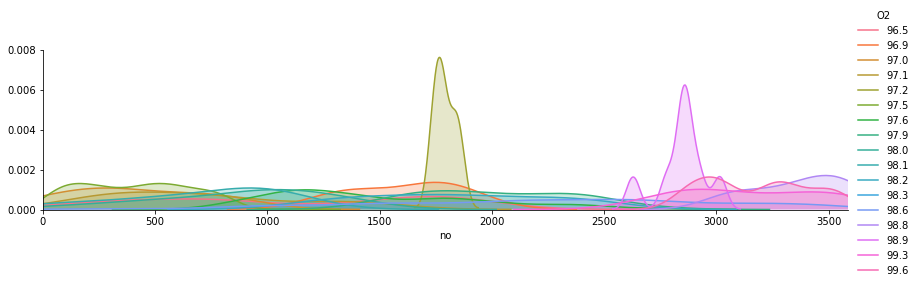

In [5]:
fig = sns.FacetGrid(o2,hue='O2',aspect=4)

fig.map(sns.kdeplot,'no',shade=True)

oldest = o2['no'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

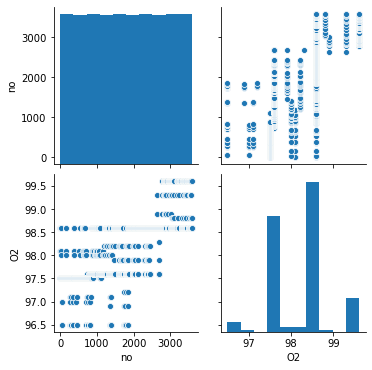

In [6]:
sns.pairplot(o2)

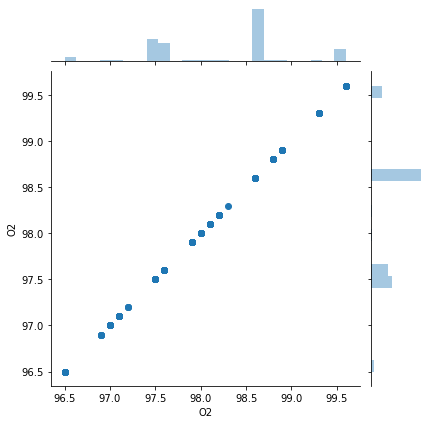

In [7]:
sns.jointplot('O2','O2',o2,kind='scatter')

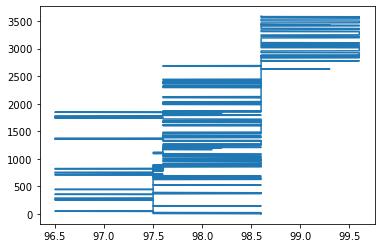

In [8]:
plt.plot(o2['O2'],o2['no'])

In [9]:
sse = []

k_range = range(1,10)
for i in k_range:
    kms = KMeans(n_clusters=i)
    kms.fit(o2[['O2']])
    sse.append(kms.inertia_)

In [10]:
sse

[1890.9202007808128,
 446.7861988831383,
 139.79507351127728,
 30.708142511754904,
 12.466579614434425,
 7.875199537609876,
 4.698145757407318,
 2.912593125828421,
 1.734514722750094]

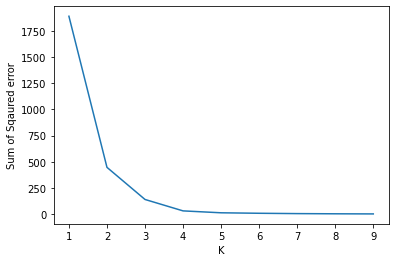

In [11]:
plt.xlabel('K')
plt.ylabel('Sum of Sqaured error')
plt.plot(k_range,sse)
plt.show()

In [12]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(o2[['O2']])
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [13]:
o2['cluster'] = y_pred
o2.head(100)

,no,O2,cluster
0,1,98.6,1
1,2,98.6,1
2,3,98.6,1
3,4,98.6,1
4,5,98.1,1
...,...,...,...
95,96,97.5,0
96,97,97.5,0
97,98,97.5,0
98,99,97.5,0


In [14]:
o2['cluster'].value_counts()

1    1739
0    1349
2     380
3     118
Name: cluster, dtype: int64

In [15]:
df1 = o2[o2.cluster==0]
df2 = o2[o2.cluster==1]
df3 = o2[o2.cluster==2]
df4 = o2[o2.cluster==3]

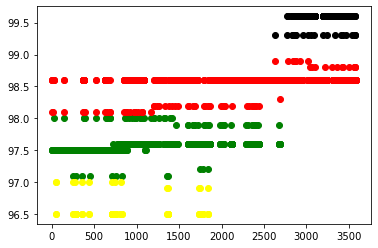

In [16]:
plt.scatter(df1.no, df1['O2'], color='green')
plt.scatter(df2.no, df2['O2'], color='red')
plt.scatter(df3.no, df3['O2'], color='black')
plt.scatter(df4.no, df4['O2'], color='yellow')

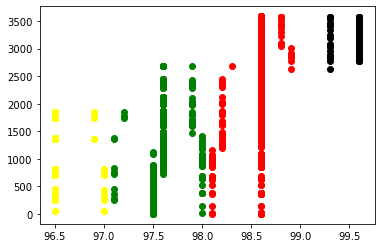

In [17]:
plt.scatter(df1.O2, df1['no'], color='green')
plt.scatter(df2.O2, df2['no'], color='red')
plt.scatter(df3.O2, df3['no'], color='black')
plt.scatter(df4.O2, df4['no'], color='yellow')

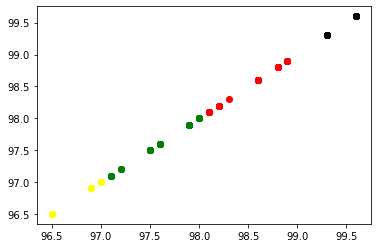

In [18]:
plt.scatter(df1.O2, df1['O2'], color='green')
plt.scatter(df2.O2, df2['O2'], color='red')
plt.scatter(df3.O2, df3['O2'], color='black')
plt.scatter(df4.O2, df4['O2'], color='yellow')

In [19]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

scaler.fit(o2[['O2']])
o2['O2'] = scaler.transform(o2[['O2']])
o2.head()

,no,O2,cluster
0,1,0.677419,1
1,2,0.677419,1
2,3,0.677419,1
3,4,0.677419,1
4,5,0.516129,1


In [20]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(o2[['O2']])
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
o2['cluster'] = y_pred
o2.head()

,no,O2,cluster
0,1,0.677419,0
1,2,0.677419,0
2,3,0.677419,0
3,4,0.677419,0
4,5,0.516129,0


In [22]:
o2['cluster'].value_counts()

0    1739
1    1349
2     380
3     118
Name: cluster, dtype: int64

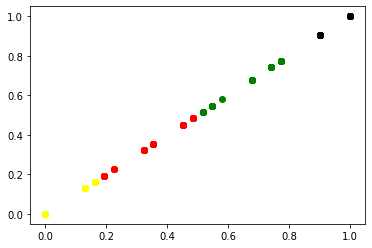

In [23]:
df_1 = o2[o2.cluster==0]
df_2 = o2[o2.cluster==1]
df_3 = o2[o2.cluster==2]
df_4 = o2[o2.cluster==3]


plt.scatter(df_1.O2, df_1['O2'], color='green')
plt.scatter(df_2.O2, df_2['O2'], color='red')
plt.scatter(df_3.O2, df_3['O2'], color='black')
plt.scatter(df_4.O2, df_4['O2'], color='yellow')


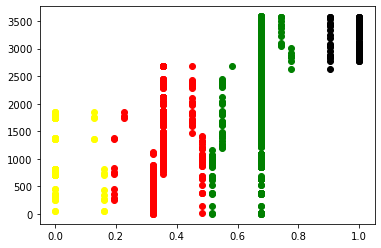

In [24]:
plt.scatter(df_1.O2, df_1['no'], color='green')
plt.scatter(df_2.O2, df_2['no'], color='red')
plt.scatter(df_3.O2, df_3['no'], color='black')
plt.scatter(df_4.O2, df_4['no'], color='yellow')


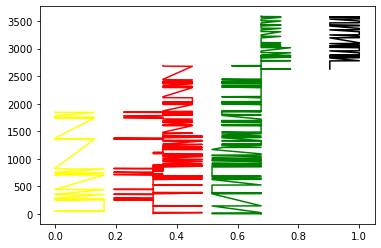

In [25]:
plt.plot(df_1.O2, df_1['no'], color='green')
plt.plot(df_2.O2, df_2['no'], color='red')
plt.plot(df_3.O2, df_3['no'], color='black')
plt.plot(df_4.O2, df_4['no'], color='yellow')


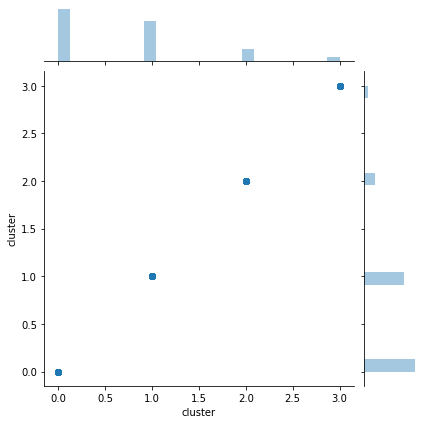

In [29]:
sns.jointplot('O2','cluster',o2,kind='scatter')

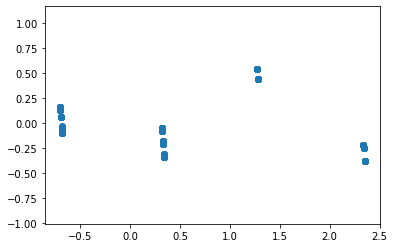

[-0.6937787 -0.6937787 -0.6937787 ... -0.6937787 -0.6937787 -0.6937787]
2.736526283353413e-16


In [26]:
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

model = PCA()

pca_feature = model.fit_transform(o2[['O2','cluster']])

xs = pca_feature[:,0]

ys = pca_feature[:,1]

plt.scatter(xs,ys)
plt.axis("equal")
plt.show()

print(xs)

correlation, pvalue = pearsonr(xs,ys)
print(correlation)

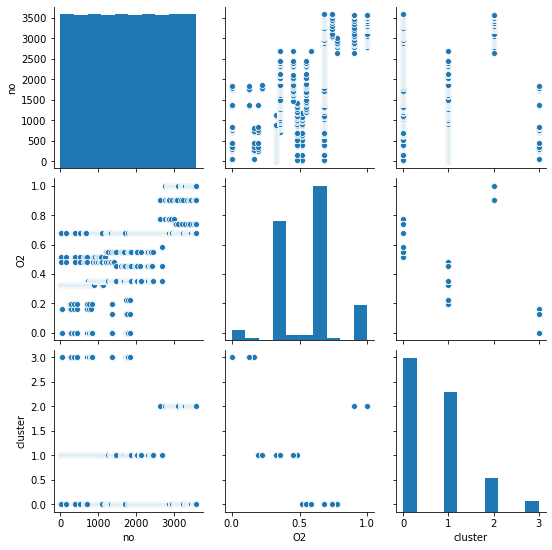

In [27]:
sns.pairplot(o2)